In [1]:
# Install seaborn for heatmap
%pip install seaborn

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('Weath.csv')

In [4]:
# Ask for rows and columns #
df.shape

(365, 10)

In [5]:
# List all the column names
df.columns

Index(['Date', 'Maximum', 'Minimum', 'Average', 'Departure', 'HDD', 'CDD',
       'Precipitation', 'New Snow', 'Snow Depth'],
      dtype='object')

In [6]:
# Show what kind of data each column has
df.dtypes

Date              object
Maximum          float64
Minimum          float64
Average          float64
Departure        float64
HDD                int64
CDD                int64
Precipitation    float64
New Snow         float64
Snow Depth       float64
dtype: object

In [7]:
# Return first 3 rows
df.head(3)

,Date,Maximum,Minimum,Average,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,11/1/2022,72.0,60.0,66.0,14.3,0,1,0.07,0.0,0.0
1,11/2/2022,73.0,53.0,63.0,11.6,2,0,0.00,0.0,0.0
2,11/3/2022,69.0,47.0,58.0,6.9,7,0,0.00,0.0,0.0


In [8]:
# Basic info for all columns; had to reload .csv file because the first time I ran this, I could see it was not what I wanted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Maximum        365 non-null    float64
 2   Minimum        365 non-null    float64
 3   Average        365 non-null    float64
 4   Departure      365 non-null    float64
 5   HDD            365 non-null    int64  
 6   CDD            365 non-null    int64  
 7   Precipitation  365 non-null    float64
 8   New Snow       365 non-null    float64
 9   Snow Depth     365 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 27.2+ KB


In [9]:
# Calculate basic statistics; probably not that useful for this data; we average 0.005 inches of snow per day? 
# But I can see the lowest high for the year (17 degees F) and the highest low (78 degrees F)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Maximum,365.0,67.169863,16.528486,17.0,54.0,68.0,82.00,97.00
Minimum,365.0,50.109589,15.492431,5.0,37.0,50.0,63.00,78.00
Average,365.0,58.639726,15.686347,12.5,45.0,59.5,72.50,87.00
Departure,365.0,3.039452,7.195208,-23.4,-1.7,1.5,7.20,24.30
HDD,365.0,10.109589,11.350754,0.0,0.0,5.0,20.00,52.00
CDD,365.0,3.983562,6.042865,0.0,0.0,0.0,8.00,22.00
Precipitation,365.0,0.140493,0.343478,0.0,0.0,0.0,0.07,3.05
New Snow,365.0,0.005479,0.073922,0.0,0.0,0.0,0.00,1.00
Snow Depth,365.0,0.008219,0.116912,0.0,0.0,0.0,0.00,2.00


In [10]:
#Now we do graphs!
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-12-4e30cb2ab4fd>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


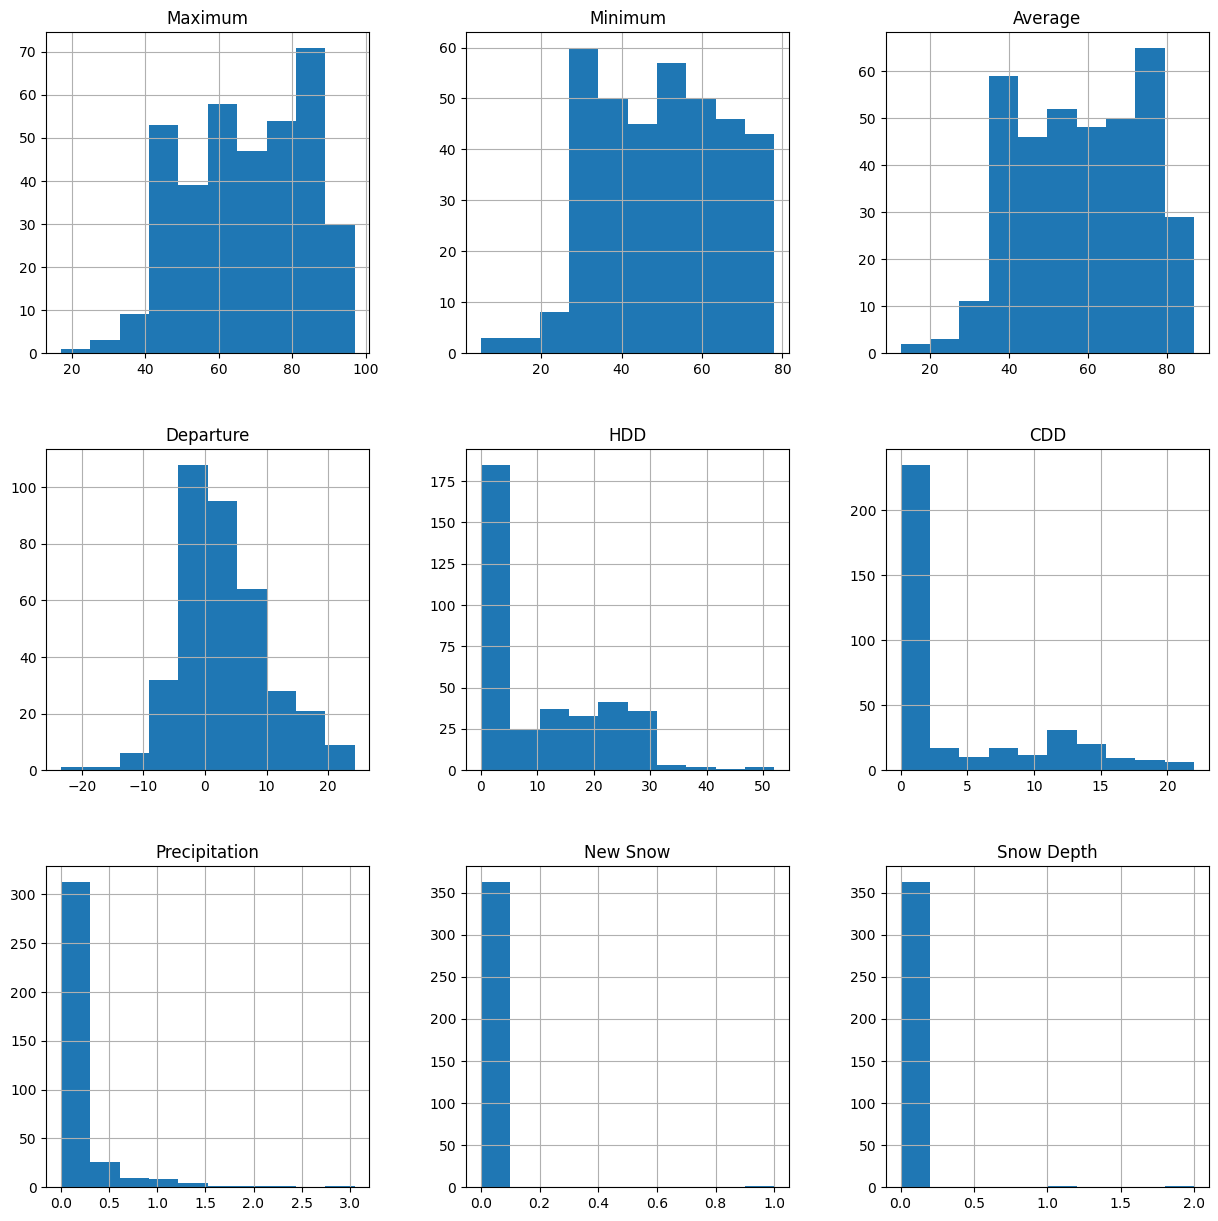

In [12]:
# Histograms for all columns. figure = pyplot.figurecommand(X by X px or mm?), axes = figure.gcacommand, graph = definition.historgram(equal axes)
# You notice it doesn't get below freezing all that often. Maybe I should compare this data to my old hometown in Minnesota...
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

<ipython-input-14-fa07f1c95212>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot:>

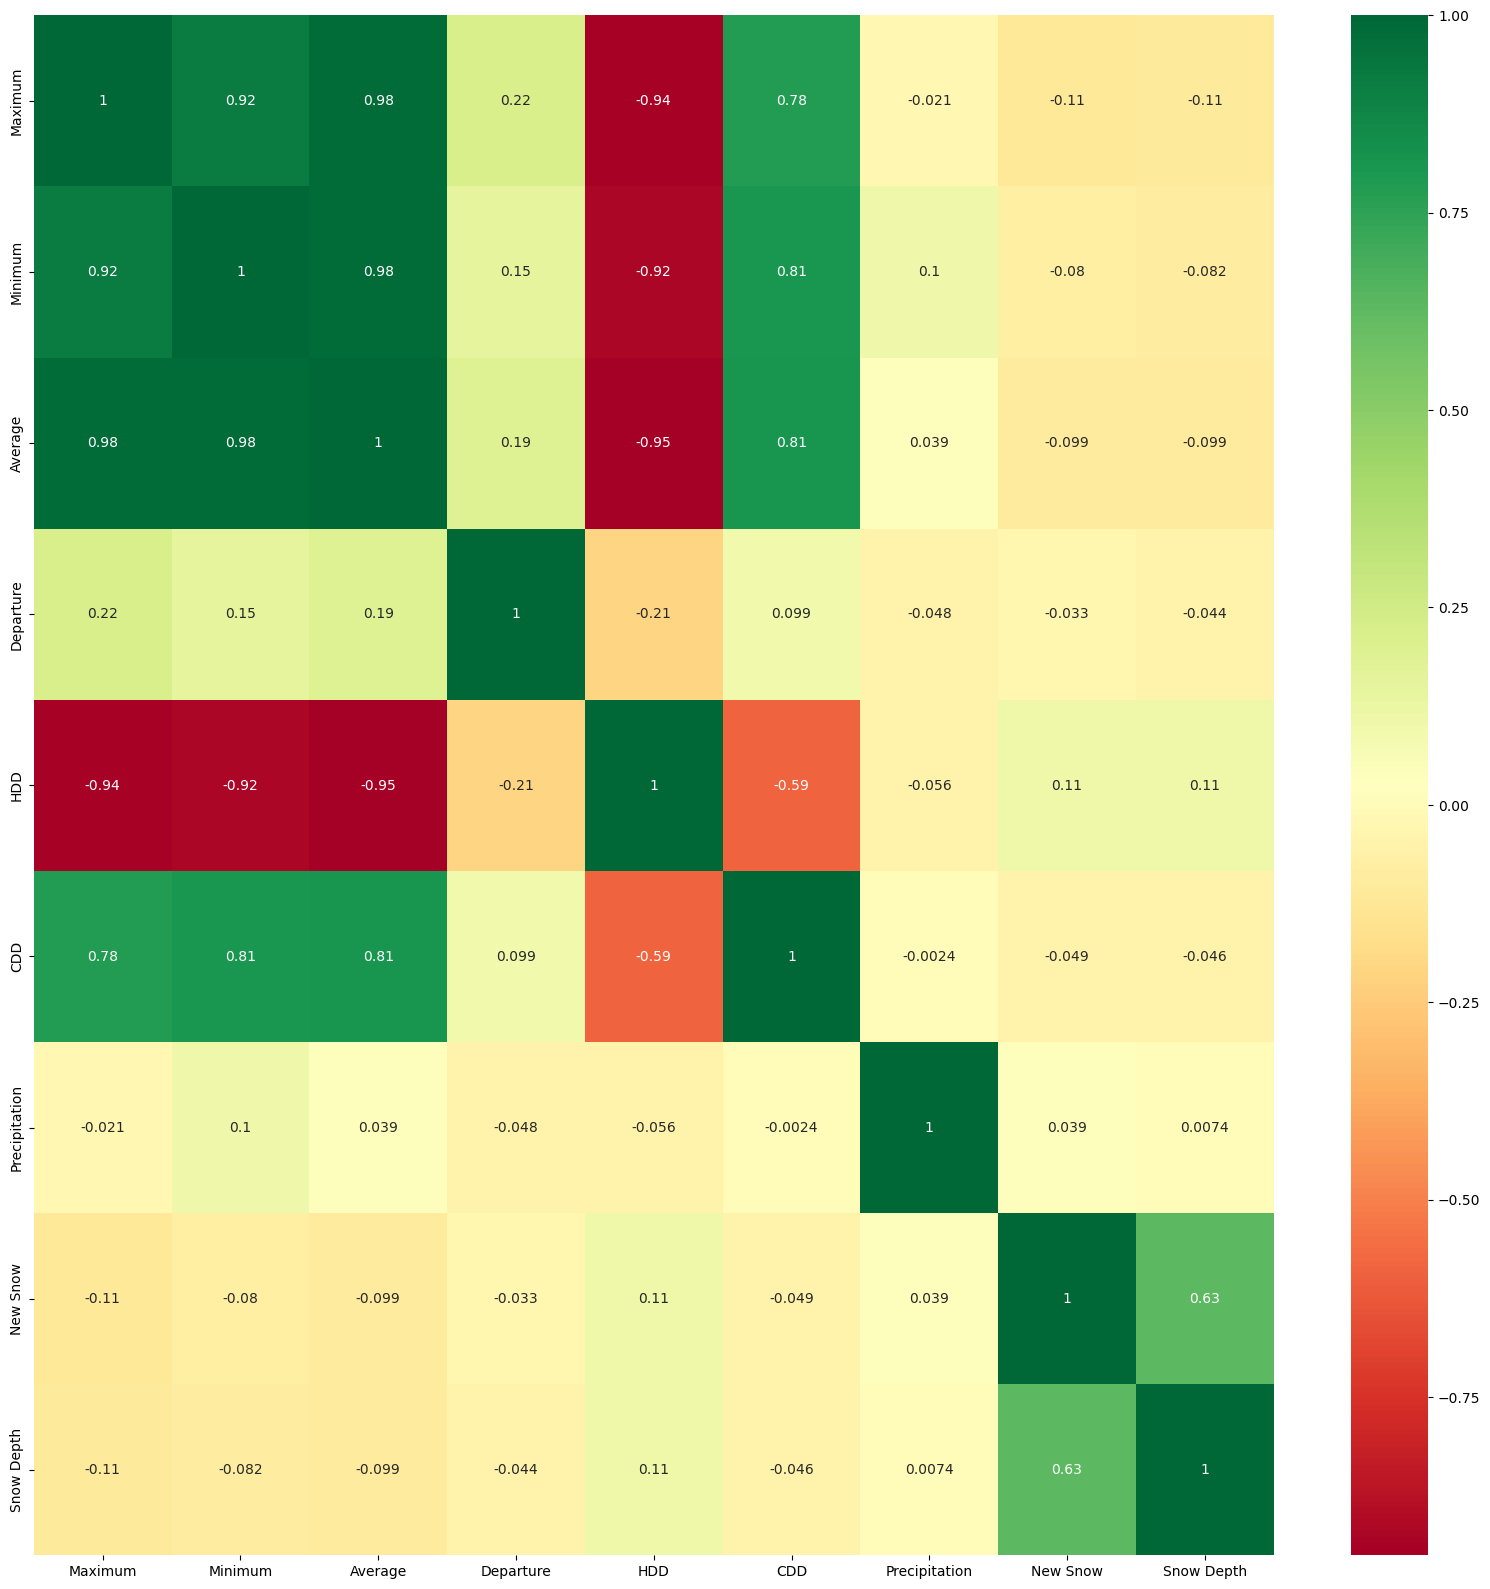

In [14]:
# Is there any correlation between these stats? Let's check using a heatmap. Not sure what the warning means, but I must have done something wrong because 
#it says the Cooling Degree Days are relevant to temperature, but Heating Degree Days are not. Maybe because it's a measure of departure from 65F?
corr_matrix = df.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot = True, cmap='RdYlGn')